## Bag of words (BOW)

1 . 통계와 머신러닝을 활용한 방법

2 .인공신경망을 활용한 방법


doc1 = 'John likes to watch movies. Mary likes moves too.'

BoW1 = {"John":1,"likes":2,"to":1,"watch":1,"movies":2,"Mary":1,"too":1}

doc2 = 'Mary also likes to watch football games.'

BoW2 = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}

doc3 = John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.

BoW3 = {"John":1,"likes":3,"to":2,"watch":2,"movies":2,"Mary":2,"too":1,"also":1,"football":1,"games":1};

## keras Tokenizer를 활용한 BoW

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ['John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.']

In [4]:
def print_bow(sentence):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(sentence) # 단어장 생성
  bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장
  print("Bag of words :", bow) #bow출력
  print('단어장(vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 갯수

print_bow(sentence)

Bag of words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(vocabulary)의 크기 : 10


## scikit-learn CountVectorizer 활용한 BoW

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ['John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.']

vector = CountVectorizer()
print('Bag of Words : ', vector.fit_transform(sentence).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록
print('각 단어의 인덱스 : ', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되는지를 보여줌.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 :  {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [6]:
print('단어장(vocabulary)의 크기 : ', len(vector.vocabulary_))

단어장(vocabulary)의 크기 :  10


## DTM ( Document-Term Matrix )

문서 1 : I like dog

문서 2 : I like cat

문서 3 : I like cat I like cat


In [7]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

# 코싸인유사도 함수
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [8]:
print(cos_sim(doc1, doc2)) 
print(cos_sim(doc1, doc3))
print(cos_sim(doc2, doc3))

0.6666666666666667
0.6666666666666667
1.0000000000000002


DTM에서는 코사인 유사도는 0이상 1이하의 값을 가지고, 값이 1에 가까울수록 유사도 높다 판단

## scikit-learn CountVectorizer 활용한 DTM 구현

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
          'John likes to watch movies.',
          'Mary likes moves too.',
          'Mary also likes to watch football games.'
]

vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지 보여준다.

[[0 0 0 1 1 0 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 0 1 0]
 [1 1 1 0 1 1 0 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 8, 'watch': 10, 'movies': 7, 'mary': 5, 'moves': 6, 'too': 9, 'also': 0, 'football': 1, 'games': 2}


## TF-IDF

모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는 것

단어의 빈도

문서의 빈도의 역수

In [27]:
from math import log
import pandas as pd

docs = [
        'John likes to watch movies and Mary likes movies too',
        'James likes to watch TV',
        'Mary also likes to watch football games',
]

In [28]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 : ', len(vocab))
print(vocab)

단어장의 크기 :  13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [29]:
N = len(docs)
N

3

In [35]:
# TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1)) + 1

def tfidf(t, d):
    return tf(t,d)* idf(t)

TF함수를 사용하여 DTM을 만들어보자

In [36]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tf(t,d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_


,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [37]:
result = []
# idf 값 result에 저장
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
# 데이터프레임으로 만들고 출력
idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


TF-IDF 행렬을 출력 DTM에 있는 각 단어의 TF에 각 단어의 iDF를 곱해준 값

In [33]:
result = []
# tfidf값 result에 저장
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))
# 데이터프레임으로 만들고 출력
tfidf_ = pd.DataFrame(result, columns= vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


## scikit-learn TFidVectorizer 활용

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
          'John likes to watch movies and Mary likes movies too',
          'James likes to watch TV',
          'Mary also likes to watch football games',
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(set(tfidfv.vocabulary_.keys()))
vocab.sort()

tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns=vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


## LSA ( 잠재의미분석)

전체 코퍼스에서 문자 속 단어들 상의 관계를 찾아내는 자연어 처리 정보 검색 기술

단어와 단어사이, 문사와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수를
찾아낸다.

In [38]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [39]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", filename="abcnews-date-text.csv")

('abcnews-date-text.csv', <http.client.HTTPMessage at 0x7f7353275cd0>)

In [42]:
data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False)

In [43]:
# 데이터는 총 갯수
print(len(data))

1082168


In [44]:
# 데이터는 2개의 열로 이루어져 있음 
# publish_data : 뉴스가 나온 날짜, headline_text : 뉴스 기사 제목
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [46]:
# 제목만 text에 저장
text = data[['headline_text']]
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [47]:
# 중복이 있는지 확인
text.nunique()

headline_text    1054983
dtype: int64

In [49]:
# 중복 제거
text.drop_duplicates(inplace=True)
text = text.reset_index(drop=True)
print(len(text))

1054983


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


데이터 정제 및 정규화

In [50]:
# 형태소 분해
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)
print(text.head(5))

                                       headline_text
0  [aba, decides, against, community, broadcastin...
1  [act, fire, witnesses, must, be, aware, of, de...
2  [a, g, calls, for, infrastructure, protection,...
3  [air, nz, staff, in, aust, strike, for, pay, r...
4  [air, nz, strike, to, affect, australian, trav...


In [51]:
#불용어 제거
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop)])
print(text.head(5))

                                       headline_text
0   [aba, decides, community, broadcasting, licence]
1    [act, fire, witnesses, must, aware, defamation]
2     [g, calls, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


In [52]:
# 단어 정규화 과정 길이가 1~2인 단어는 제거하는 전처리
# 3인칭 단수 표현을 1인칭으로 바꾸는작업
# 과거형 동사 -> 현재형 동사등을 수행
from nltk.stem import WordNetLemmatizer
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

                                       headline_text
0       [aba, decide, community, broadcast, licence]
1      [act, fire, witness, must, aware, defamation]
2      [g, call, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


In [53]:
# 길이 1~2인 단어 제거
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(tokenized_doc[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


In [55]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc=[]
for i in range(len(text)):
  t = ' '.join(tokenized_doc[i])
  detokenized_doc.append(t)

train_data = detokenized_doc

In [56]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [57]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features= 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)

In [58]:
# DTM의 크기
print('행렬의 크기 : ', document_term_matrix.shape) # 문서의 수 X 단어 집합의 크기

행렬의 크기 :  (1054983, 5000)


## scikit-learn Truncated SVD 활용

In [59]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20407591e-02, -3.66546168e-03,  1.82406743e-02, ...,
         3.10292204e-03,  3.31269331e-03,  1.05703026e-02],
       [ 2.89798007e-02, -1.11288713e-02,  1.82752840e-02, ...,
         1.64763152e-03, -5.02826917e-03,  4.52647562e-04],
       [ 5.02372390e-03, -2.03374028e-03,  9.79825779e-03, ...,
        -4.56534481e-03,  1.88851947e-03,  6.46410653e-04],
       ...,
       [ 2.96190373e-02,  3.58570865e-03,  2.53703957e-02, ...,
         3.59200030e-02,  2.18579472e-02,  1.29510317e-02],
       [ 6.24168527e-02, -7.18885120e-03,  1.33835920e-01, ...,
         8.17535624e-01,  9.07088722e-01, -2.54923104e-01],
       [ 7.19622856e-02,  2.89931449e-02,  2.27870271e-03, ...,
         1.72507021e-02,  3.90570114e-02,  2.78575081e-02]])

In [60]:
print(np.shape(lsa_model.components_))

(10, 5000)


In [61]:
terms = c_vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
  for idx, topic in enumerate(components):
    print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

In [62]:
get_topics(lsa_model.components_, terms)
# LSA에 대한 결과물

Topic 1: [('police', 0.74635), ('man', 0.45353), ('charge', 0.21089), ('new', 0.1409), ('court', 0.11148)]
Topic 2: [('man', 0.69429), ('charge', 0.3003), ('court', 0.16808), ('face', 0.11487), ('murder', 0.10596)]
Topic 3: [('new', 0.83656), ('plan', 0.23648), ('say', 0.18263), ('council', 0.10996), ('govt', 0.10953)]
Topic 4: [('say', 0.73895), ('plan', 0.35864), ('govt', 0.16654), ('council', 0.12815), ('urge', 0.0778)]
Topic 5: [('plan', 0.73189), ('council', 0.16936), ('govt', 0.15926), ('urge', 0.08614), ('water', 0.07814)]
Topic 6: [('govt', 0.54576), ('court', 0.25574), ('urge', 0.23495), ('fund', 0.19352), ('nsw', 0.15899)]
Topic 7: [('charge', 0.51722), ('court', 0.46553), ('face', 0.34584), ('murder', 0.11324), ('plan', 0.11176)]
Topic 8: [('win', 0.57198), ('court', 0.41845), ('kill', 0.18347), ('crash', 0.10992), ('cup', 0.07986)]
Topic 9: [('win', 0.66011), ('charge', 0.43276), ('council', 0.09771), ('australia', 0.08794), ('cup', 0.0725)]
Topic 10: [('council', 0.53754),

TF-IDF 행렬 생성

In [63]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features= 5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :',tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


scikit-learn LDA model활용

In [64]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

In [65]:
print(np.shape(lda_model.components_))

(10, 5000)


In [66]:
# LDA의 결과 토픽과 각 단어의 비중을 출력합시다
terms = tfidf_vectorizer.get_feature_names() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('australia', 9359.06334), ('sydney', 5854.97288), ('attack', 4784.76322), ('change', 4193.63035), ('year', 3924.88997)]
Topic 2: [('government', 6344.07413), ('charge', 5947.12292), ('man', 4519.7974), ('state', 3658.16422), ('live', 3625.10473)]
Topic 3: [('australian', 7666.65651), ('say', 7561.01807), ('police', 5513.22932), ('home', 4048.38409), ('report', 3796.04446)]
Topic 4: [('melbourne', 5298.35047), ('south', 4844.59835), ('death', 4281.78433), ('china', 3214.44581), ('women', 3029.28443)]
Topic 5: [('win', 5704.0914), ('canberra', 4322.0963), ('die', 4025.63057), ('open', 3771.65243), ('warn', 3577.47151)]
Topic 6: [('court', 5246.3124), ('world', 4536.86331), ('country', 4166.34794), ('woman', 3983.97748), ('crash', 3793.50267)]
Topic 7: [('election', 5418.5038), ('adelaide', 4864.95604), ('house', 4478.6135), ('school', 3966.82676), ('2016', 3955.11155)]
Topic 8: [('trump', 8189.58575), ('new', 6625.2724), ('north', 3705.40987), ('rural', 3521.42659), ('donald',

## 영어 데이터 Word2Vec 실습

In [67]:
!pip install nltk
!pip install gensim

In [68]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
from nltk.corpus import abc
corpus = abc.sents()

In [70]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [71]:
print('코퍼스의 크기 :', len(corpus))

코퍼스의 크기 : 29059


In [72]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, size = 100, window = 5, min_count=5, workers = 4, sg = 0)
# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

In [73]:
model_result = model.wv.most_similar('man')

In [74]:
print(model_result)

[('woman', 0.9310699701309204), ('asteroid', 0.9199953079223633), ('third', 0.9185409545898438), ('Bang', 0.9172960519790649), ('skull', 0.914071798324585), ('rally', 0.9120283126831055), ('infant', 0.9034899473190308), ('dinosaur', 0.9032652378082275), ('bought', 0.9028406739234924), ('dog', 0.9028191566467285)]


In [75]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('./w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("./w2v") # 모델 로드
print('모델 load완료')

모델 load완료


In [76]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9310699701309204), ('asteroid', 0.9199953079223633), ('third', 0.9185409545898438), ('Bang', 0.9172960519790649), ('skull', 0.914071798324585), ('rally', 0.9120283126831055), ('infant', 0.9034899473190308), ('dinosaur', 0.9032652378082275), ('bought', 0.9028406739234924), ('dog', 0.9028191566467285)]


In [77]:
# vocabulary에 없는 단어여서 에러가 뜸
loaded_model.most_similar('overacting')

KeyError: ignored

In [78]:
loaded_model.most_similar('memory')

[('jolt', 0.9726612567901611),
 ('structures', 0.9715487957000732),
 ('lifting', 0.9696923494338989),
 ('springs', 0.9691317677497864),
 ('chasing', 0.968883752822876),
 ('infection', 0.9684925675392151),
 ('broad', 0.9684553146362305),
 ('display', 0.9673017263412476),
 ('video', 0.9670794010162354),
 ('charged', 0.9667096734046936)]

## 한글 데이터 Word2Vec 실습

In [79]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 450kB 55.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [81]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f73493f6e50>)

In [83]:
train_data = pd.read_table('ratings.txt')

In [84]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [85]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 200000


In [86]:
train_data.isnull().values.any()

True

In [87]:
train_data.isna().sum()

id          0
document    8
label       0
dtype: int64

In [88]:
train_data = train_data.dropna(how='any')
train_data.isnull().values.any()

False

In [89]:
train_data.isna().sum()

id          0
document    0
label       0
dtype: int64

In [90]:
print(len(train_data))

199992


In [91]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

In [92]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [93]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [94]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 73
리뷰의 평균 길이 : 10.75330013200528


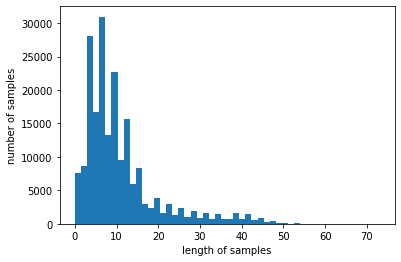

In [95]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [96]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.

In [97]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16403, 100)

In [98]:
# 유사도
print(model.wv.most_similar("최민식"))

[('한석규', 0.8507433533668518), ('김갑수', 0.8335482478141785), ('안성기', 0.8213657140731812), ('조승우', 0.8209714889526367), ('조재현', 0.8174641132354736), ('김수현', 0.8150749206542969), ('이민호', 0.8103166222572327), ('김명민', 0.8082443475723267), ('대성', 0.8039977550506592), ('다우니', 0.8011084198951721)]


In [99]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.870733380317688), ('느와르', 0.8670439124107361), ('무협', 0.8560470342636108), ('호러', 0.8554454445838928), ('무비', 0.8404479622840881), ('정통', 0.8262103199958801), ('블랙', 0.8244454860687256), ('블록버스터', 0.8123672604560852), ('멜로', 0.805862307548523), ('물의', 0.8032897710800171)]


## 사전 훈련된 워드 임베딩

In [101]:
import gensim
model = gensim.models.Word2Vec.load('/content/ko.bin')

In [102]:
result = model.wv.most_similar('강아지')
print(result)

[('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223154067993), ('멧돼지', 0.6950401067733765), ('엄마', 0.6934334635734558), ('난쟁이', 0.6806551218032837), ('한마리', 0.6770296096801758), ('아가씨', 0.6750352382659912), ('아빠', 0.6729634404182434), ('목걸이', 0.6512460708618164)]


In [103]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [104]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1] # 긍정 1 부정 0

In [105]:
# 토 큰 화
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


In [106]:
# 인코딩
x_encoded = t.texts_to_sequences(sentences)
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [107]:
max_len = max(len(l) for l in x_encoded)
print(max_len)

4


In [108]:
# Padding
x_train = pad_sequences(x_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print(x_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(vocab_size, 4, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 4)              64        
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6981 - acc: 0.2857
Epoch 2/100
1/1 - 0s - loss: 0.6965 - acc: 0.4286
Epoch 3/100
1/1 - 0s - loss: 0.6949 - acc: 0.4286
Epoch 4/100
1/1 - 0s - loss: 0.6934 - acc: 0.5714
Epoch 5/100
1/1 - 0s - loss: 0.6918 - acc: 0.5714
Epoch 6/100
1/1 - 0s - loss: 0.6903 - acc: 0.5714
Epoch 7/100
1/1 - 0s - loss: 0.6888 - acc: 0.5714
Epoch 8/100
1/1 - 0s - loss: 0.6872 - acc: 0.5714
Epoch 9/100
1/1 - 0s - loss: 0.6857 - acc: 0.5714
Epoch 10/100
1/1 - 0s - loss: 0.6842 - acc: 0.5714
Epoch 11/100
1/1 - 0s - loss: 0.6826 - acc: 0.5714
Epoch 12/100
1/1 - 0s - loss: 0.6811 - acc: 0.5714
Epoch 13/100
1/1 - 0s - loss: 0.6796 - acc: 0.5714
Epoch 14/100
1/1 - 0s - loss: 0.6781 - acc: 0.5714
Epoch 15/100
1/1 - 0s - loss: 0.6766 - acc: 0.7143
Epoch 16/100
1/1 - 0s - loss: 0.6750 - acc: 0.7143
Epoch 17/100
1/1 - 0s - loss: 0.6735 - acc: 0.7143
Epoch 18/100
1/1 - 0s - loss: 0.6720 - acc: 0.7143
Epoch 19/100
1/1 - 0s - loss: 0.6705 - acc: 0.8571
Epoch 20/100
1/1 - 0s - loss: 0.6689 - a